# Importando os dados

**Intenção de compra online dos consumidores**

Os dados podem ser obtidos através do seguinte link: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import re
from keras.models import load_model
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
# Carregar o conjunto de dados
data = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
# Exibir as primeiras linhas do conjunto de dados
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
# Exibir informações sobre o conjunto de dados
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Verificar a distribuição das variáveis categóricas
print(data.describe(include=['object']))

        Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551


# Análise dos dados

<ipython-input-6-70ecfceb1d32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='VisitorType', palette='viridis')


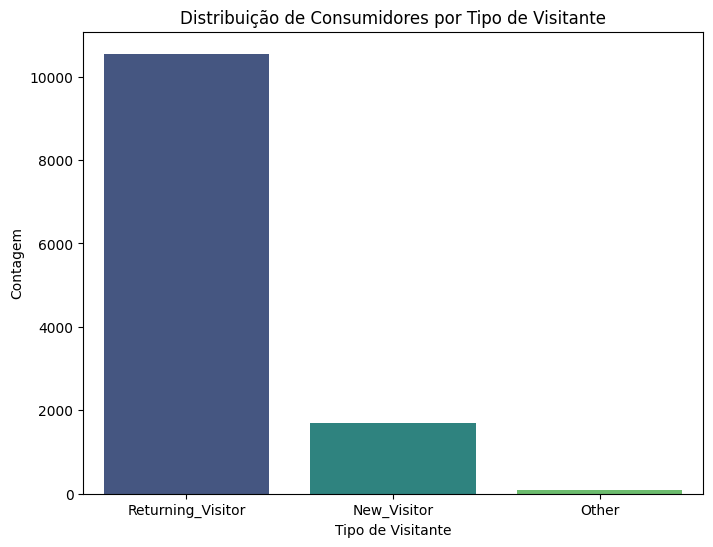

In [ ]:
# Analisar a distribuição de consumidores por tipo de visitante
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='VisitorType', palette='viridis')
plt.title('Distribuição de Consumidores por Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Contagem')
plt.show()

<ipython-input-7-9e0698456358>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_rate, x='VisitorType', y='Revenue', palette='viridis')


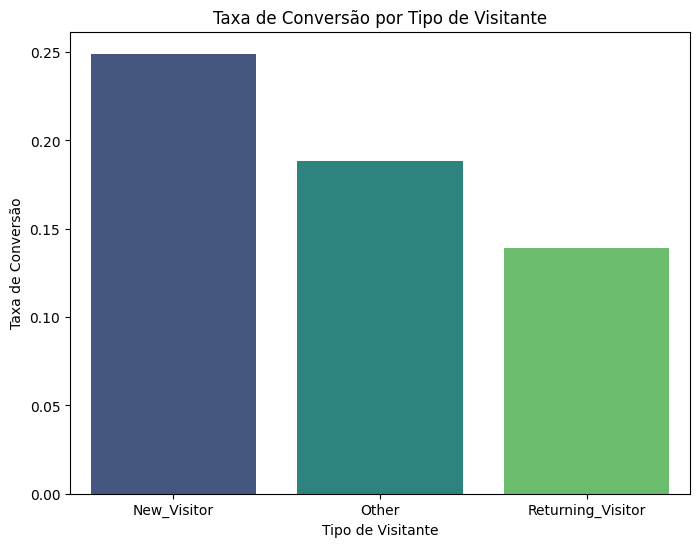

In [ ]:
# Analisar a taxa de conversão (Revenue) por tipo de visitante
conversion_rate = data.groupby('VisitorType')['Revenue'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=conversion_rate, x='VisitorType', y='Revenue', palette='viridis')
plt.title('Taxa de Conversão por Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Taxa de Conversão')
plt.show()

<ipython-input-8-22fbb1431c23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Month', palette='viridis', order=data['Month'].value_counts().index)


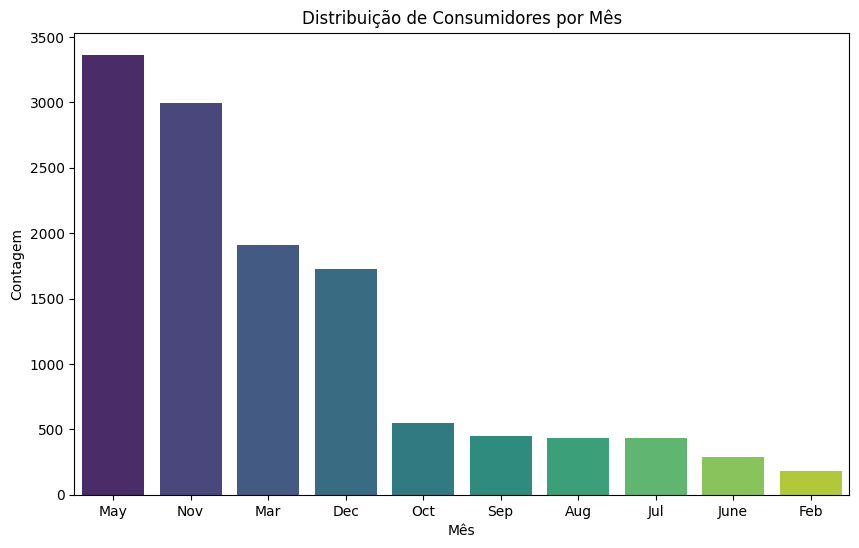

In [ ]:
# Analisar a distribuição de consumidores por mês
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month', palette='viridis', order=data['Month'].value_counts().index)
plt.title('Distribuição de Consumidores por Mês')
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.show()

<ipython-input-9-4d6c526f969c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_rate_month, x='Month', y='Revenue', palette='viridis', order=data['Month'].value_counts().index)


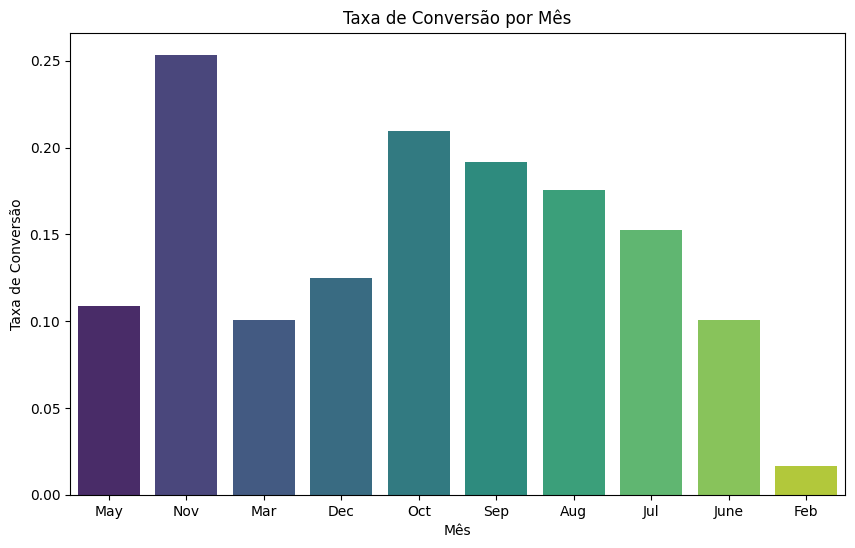

In [ ]:
# Analisar a taxa de conversão por mês
conversion_rate_month = data.groupby('Month')['Revenue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_rate_month, x='Month', y='Revenue', palette='viridis', order=data['Month'].value_counts().index)
plt.title('Taxa de Conversão por Mês')
plt.xlabel('Mês')
plt.ylabel('Taxa de Conversão')
plt.show()

<ipython-input-10-afa8b731964b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Revenue', y='Administrative_Duration', palette='viridis')


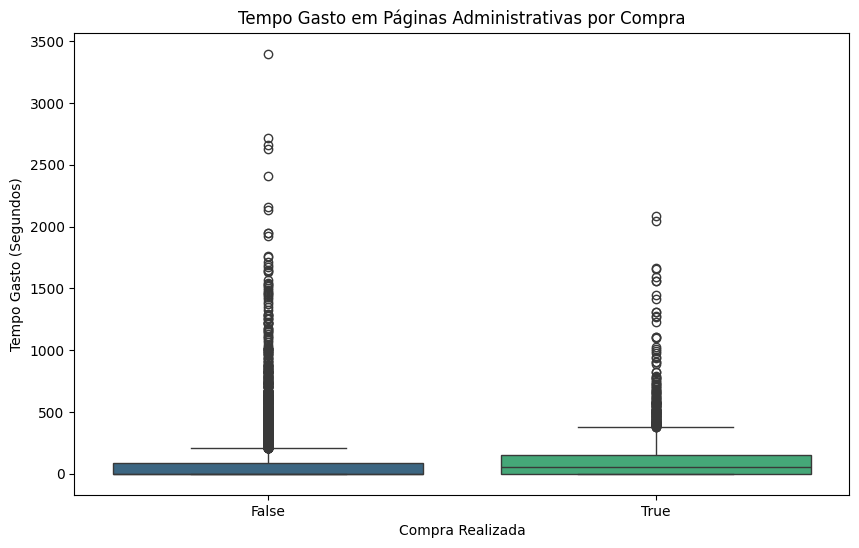

In [ ]:
# Análise do tempo gasto em diferentes páginas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Revenue', y='Administrative_Duration', palette='viridis')
plt.title('Tempo Gasto em Páginas Administrativas por Compra')
plt.xlabel('Compra Realizada')
plt.ylabel('Tempo Gasto (Segundos)')
plt.show()

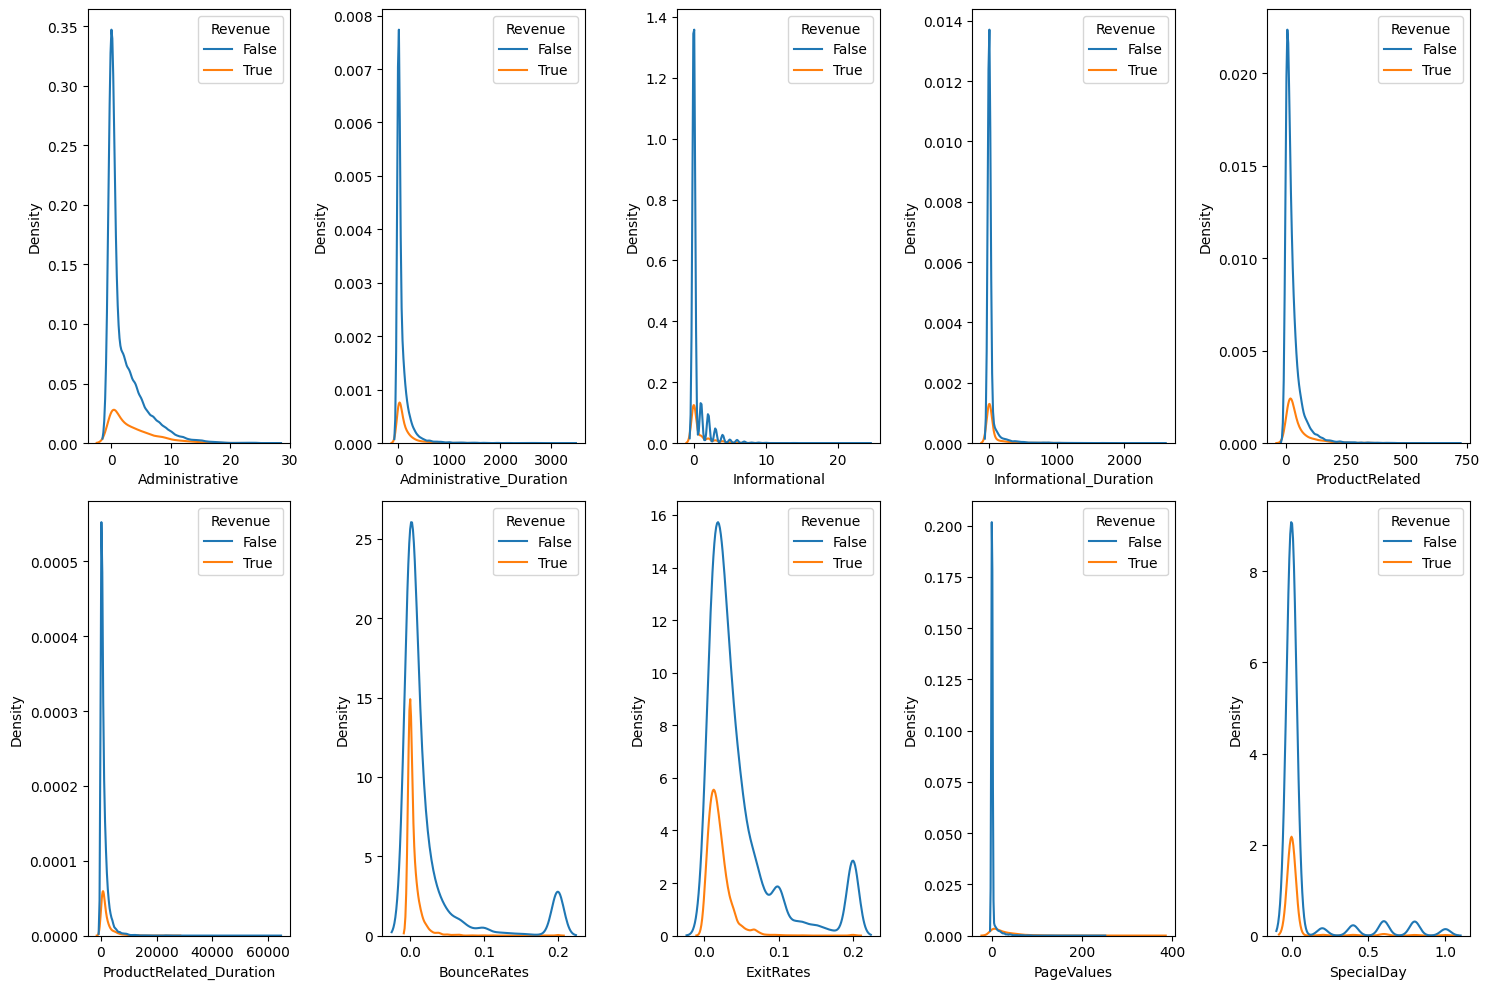

In [ ]:
dataTemp = data.astype({'OperatingSystems': object, 'Browser': object, 'Region': object, 'TrafficType': object})

numericals   = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']
categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
timestamps   = ['Month']

plt.figure(figsize=(15, 10))
# displot for numerical features
for i in range(0, len (numericals)-1):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x = dataTemp[numericals[i]], hue = dataTemp['Revenue'])
    plt.xlabel(numericals[i])
    plt.tight_layout()

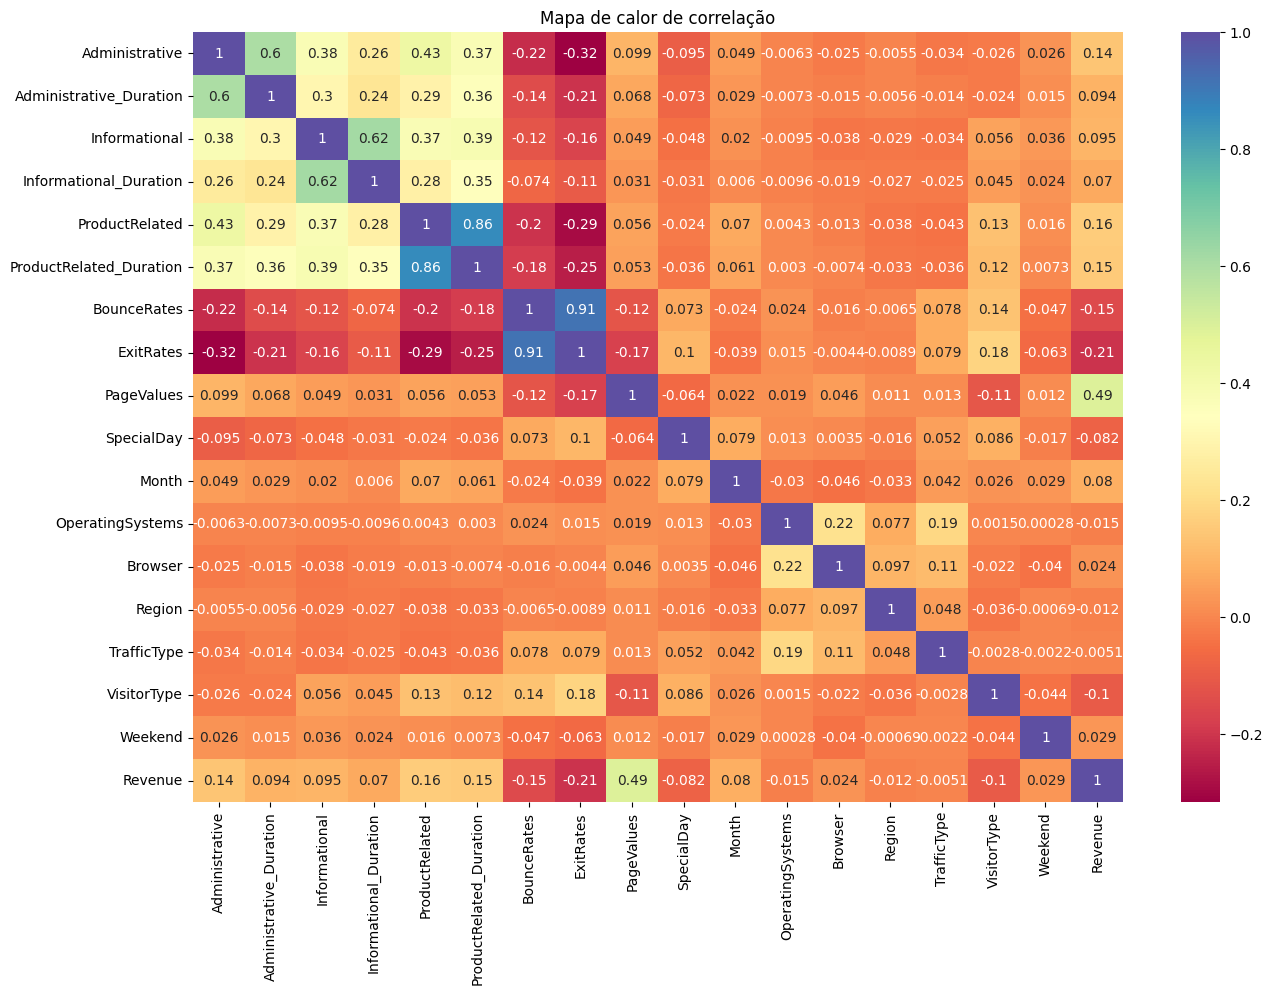

In [ ]:
# Codificar variáveis categóricas 'Revenue' e 'Weekend'
lb = LabelEncoder()
data['Revenue'] = lb.fit_transform(data['Revenue'])
data['Weekend'] = lb.fit_transform(data['Weekend'])

# Codificar colunas categóricas restantes: 'Month' e 'VisitorType'
data['Month'] = lb.fit_transform(data['Month'])
data['VisitorType'] = lb.fit_transform(data['VisitorType'])

# Gerar o mapa de calor de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='Spectral')
plt.title('Mapa de calor de correlação')
plt.show()

# Treinamento, classificação, regularização e otimização

---



In [ ]:
# Codificar variáveis categóricas
label_encoders = {}
label_encoders['Month'] = LabelEncoder()
data['Month'] = label_encoders['Month'].fit_transform(data['Month'])
label_encoders['VisitorType'] = LabelEncoder()
data['VisitorType'] = label_encoders['VisitorType'].fit_transform(data['VisitorType'])
label_encoders['Revenue'] = LabelEncoder()
data['Revenue'] = label_encoders['Revenue'].fit_transform(data['Revenue'])

In [ ]:
# Separar features (X) e target (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [ ]:
# Normalizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

###Otimizadores na Rede Neural

Um `otimizador` ajusta os parâmetros de um modelo de aprendizado de máquina de forma que ele minimize (ou maximize) uma função de custo ou perda. Em outras palavras, ele diminui a perda



In [ ]:
# Lista de otimizadores para comparar
optimizers = ['adam', 'adadelta', 'rmsprop', 'adagrad', tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)]
optimizersNames = ['Adam', 'AdaDelta', 'RMSProp', 'AdaGrad', 'SGDNesterov']

In [ ]:
# Função para construir e treinar o modelo
def build_and_train_model(optimizer_name):
    # Definir a arquitetura da rede neural
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compilar o modelo com o otimizador específico
    model.compile(optimizer=optimizer_name, loss='binary_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

    index = optimizers.index(optimizer_name)

    # Avaliar o modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Optimizer: {optimizersNames[index]}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    # Previsões no conjunto de teste
    y_pred = model.predict(X_test).ravel()
    y_train_pred = model.predict(X_train).ravel()

    # AUC no conjunto de treino e teste
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_pred)
    print(f'AUC on training set: {auc_train:.3f}')
    print(f'AUC on test set: {auc_test:.3f}')

    # Relatório de classificação
    print(classification_report(y_test, (y_pred > 0.5).astype(int)))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
    plt.figure(figsize=(6, 4))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Purchase', 'Purchase']).plot(cmap='Blues')
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title(f'Matriz de Confusão - {optimizersNames[index]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return history


Treinando com o otimizador: Adam
Optimizer: Adam, Loss: 0.2742, Accuracy: 0.8848
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC on training set: 0.917
AUC on test set: 0.905
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.71      0.52      0.60       411

    accuracy                           0.88      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.88      0.88      2466



<Figure size 600x400 with 0 Axes>

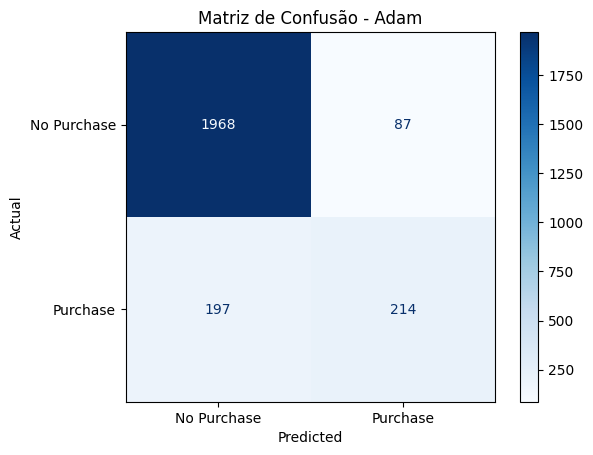


Treinando com o otimizador: AdaDelta
Optimizer: AdaDelta, Loss: 0.6271, Accuracy: 0.7275
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC on training set: 0.615
AUC on test set: 0.636
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2055
           1       0.28      0.40      0.33       411

    accuracy                           0.73      2466
   macro avg       0.57      0.60      0.58      2466
weighted avg       0.77      0.73      0.75      2466



<Figure size 600x400 with 0 Axes>

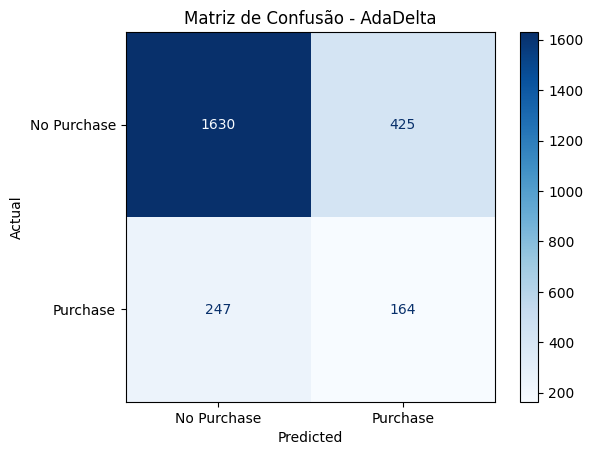


Treinando com o otimizador: RMSProp
Optimizer: RMSProp, Loss: 0.2863, Accuracy: 0.8840
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC on training set: 0.912
AUC on test set: 0.891
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.73      0.48      0.58       411

    accuracy                           0.88      2466
   macro avg       0.82      0.72      0.76      2466
weighted avg       0.87      0.88      0.87      2466



<Figure size 600x400 with 0 Axes>

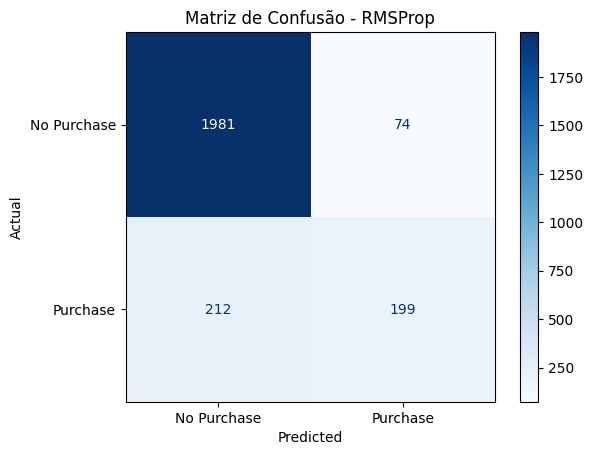


Treinando com o otimizador: AdaGrad
Optimizer: AdaGrad, Loss: 0.3832, Accuracy: 0.8504
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC on training set: 0.829
AUC on test set: 0.820
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2055
           1       0.83      0.13      0.22       411

    accuracy                           0.85      2466
   macro avg       0.84      0.56      0.57      2466
weighted avg       0.85      0.85      0.80      2466



<Figure size 600x400 with 0 Axes>

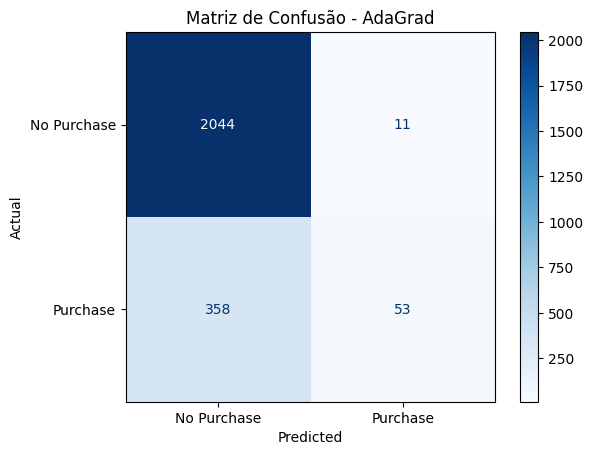


Treinando com o otimizador: SGDNesterov
Optimizer: SGDNesterov, Loss: 0.2828, Accuracy: 0.8812
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC on training set: 0.915
AUC on test set: 0.903
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.74      0.45      0.56       411

    accuracy                           0.88      2466
   macro avg       0.82      0.71      0.74      2466
weighted avg       0.87      0.88      0.87      2466



<Figure size 600x400 with 0 Axes>

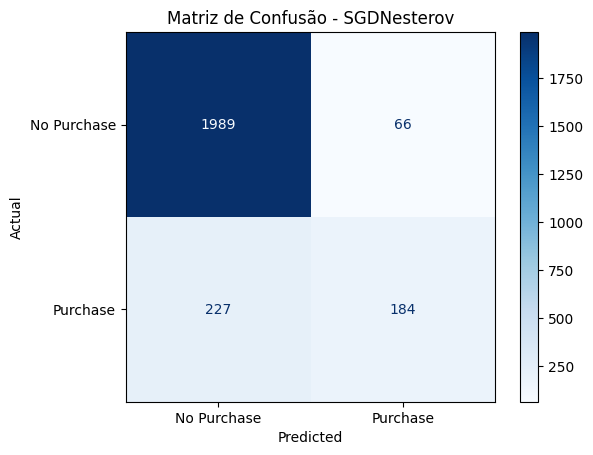

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Armazenar os históricos de treino para plotagem
histories = {}
# Treinar o modelo com cada otimizador e armazenar o histórico
for optimizer_name in optimizers:
    index = optimizers.index(optimizer_name)

    print(f"\nTreinando com o otimizador: {optimizersNames[index]}")
    history = build_and_train_model(optimizer_name)
    histories[optimizer_name] = history

# Plotando as curvas de treino e validação para cada otimizador
plt.figure(figsize=(15, 10))

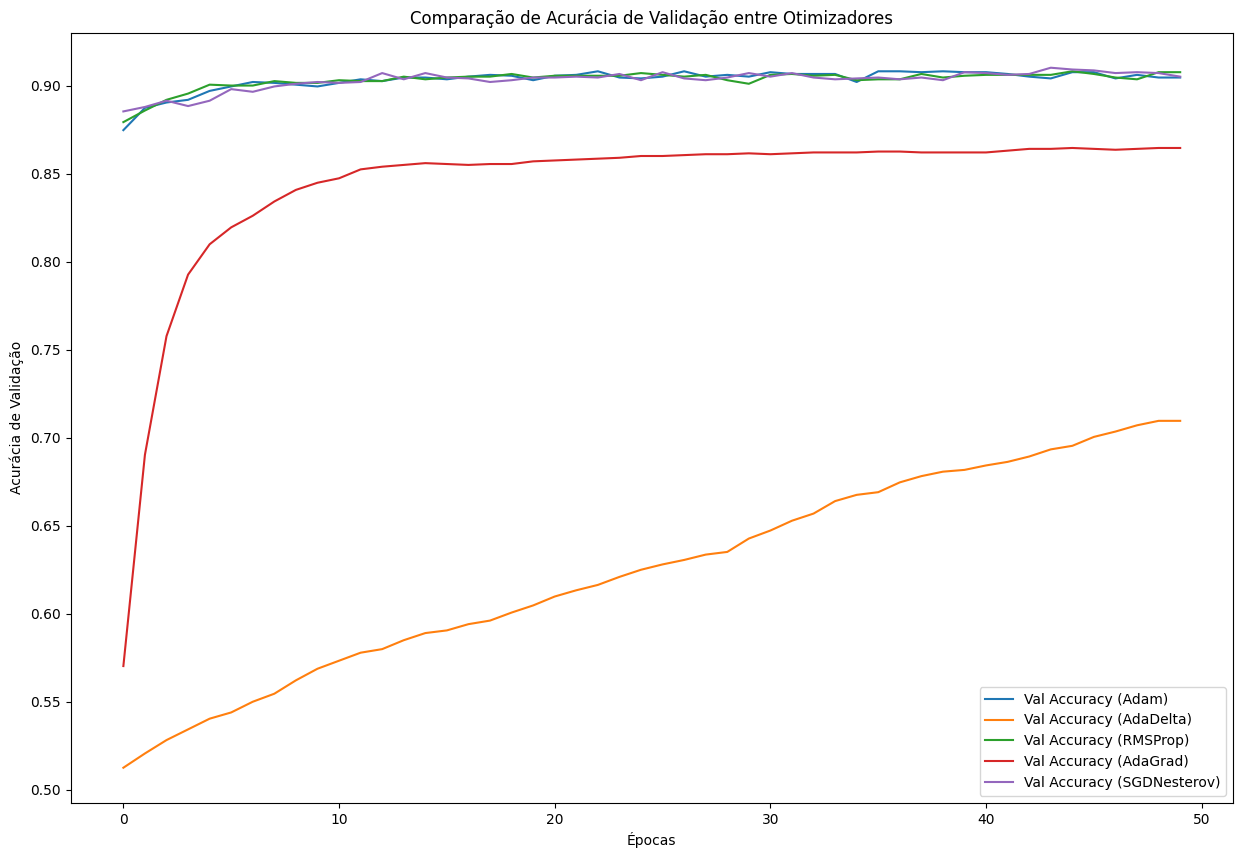

In [ ]:
plt.figure(figsize=(15, 10))

for optimizer_name, history in histories.items():
    index = optimizers.index(optimizer_name)
    # Acurácia
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({optimizersNames[index]})')

plt.title('Comparação de Acurácia de Validação entre Otimizadores')
plt.xlabel('Épocas')
plt.ylabel('Acurácia de Validação')
plt.legend()
plt.show()

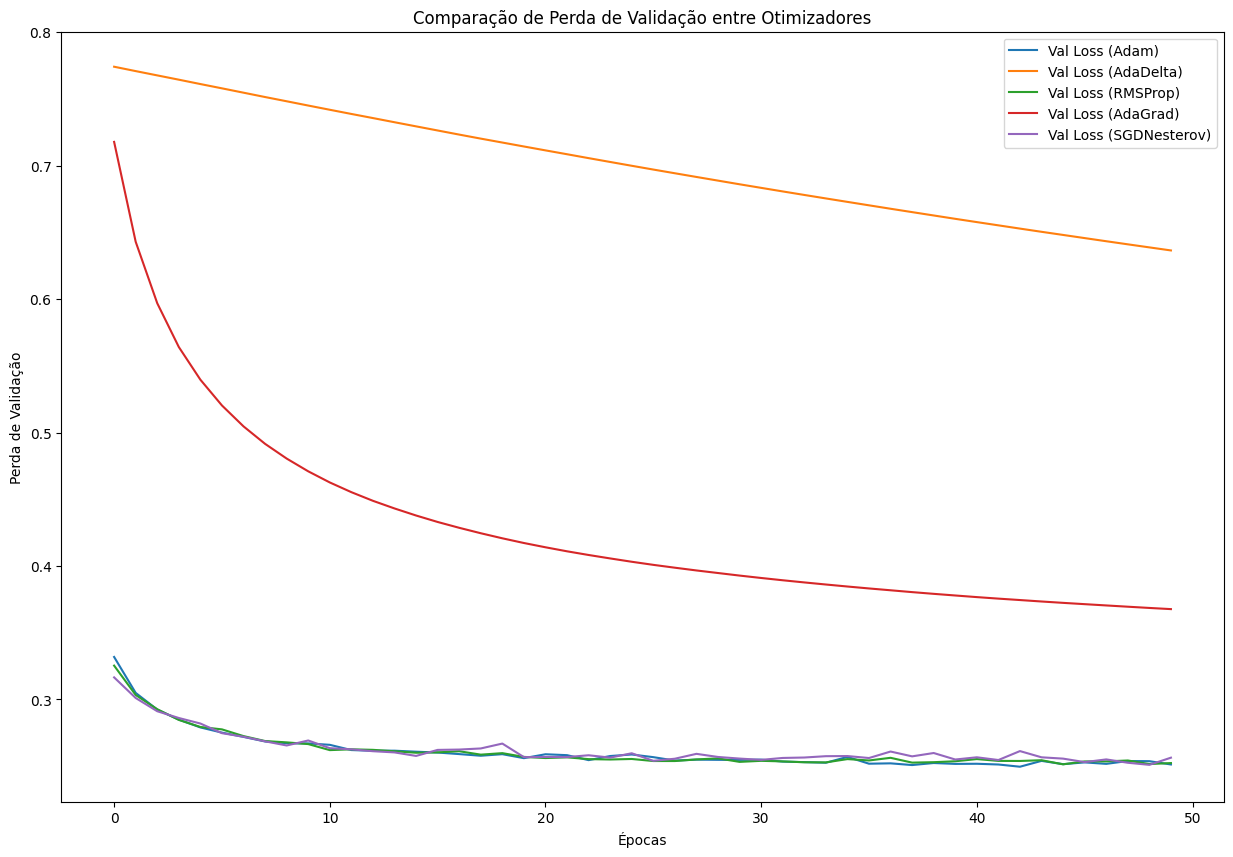

In [ ]:
plt.figure(figsize=(15, 10))
for optimizer_name, history in histories.items():
    index = optimizers.index(optimizer_name)
    # Perda
    plt.plot(history.history['val_loss'], label=f'Val Loss ({optimizersNames[index]})')

plt.title('Comparação de Perda de Validação entre Otimizadores')
plt.xlabel('Épocas')
plt.ylabel('Perda de Validação')
plt.legend()
plt.show()

###Classificadores

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True)
}

# Dados dos melhores scores de cada classificador
classifiers_names = ['Random Forest', 'XGBoost', 'AdaBoost', 'SVM']
best_scores = []

####Análise dos melhores hiperparâmetros


In [ ]:
param_grid = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

In [ ]:
def optimize_classifier(classifier, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                               scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    score = grid_search.best_score_
    best_scores.append(score)
    print(f"Melhor score: {grid_search.best_score_:.4f}")
    return grid_search

####Avaliação do melhor modelo

In [ ]:
def train_and_evaluate_classifier(grid_search, classifier_name):
    # Melhor classificador
    best_classifier = grid_search.best_estimator_

    # Avaliar o melhor classificador
    y_pred = best_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classifier: {classifier_name}, Accuracy: {accuracy:.4f}")

    # Calcular AUC
    auc_train = roc_auc_score(y_train, best_classifier.predict_proba(X_train)[:, 1])
    auc_test = roc_auc_score(y_test, best_classifier.predict_proba(X_test)[:, 1])
    print(f'AUC on training set: {auc_train:.3f}')
    print(f'AUC on test set: {auc_test:.3f}')

    # Relatório de classificação
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title(f'Matriz de Confusão - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
optimized_classifiers = {}
for classifier_name, classifier in classifiers.items():
    print(f"\nOtimização do classificador: {classifier_name}")
    best_classifier = optimize_classifier(classifier, param_grid[classifier_name], X_train, y_train)
    optimized_classifiers[classifier_name] = best_classifier


Otimização do classificador: Random Forest
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Melhores parâmetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Melhor score: 0.9048

Otimização do classificador: XGBoost
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Melhor score: 0.9021

Otimização do classificador: AdaBoost
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Melhores parâmetros: {'learning_rate': 0.1, 'n_estimators': 100}
Melhor score: 0.8968

Otimização do classificador: SVM
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Melhores parâmetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor score: 0.8942


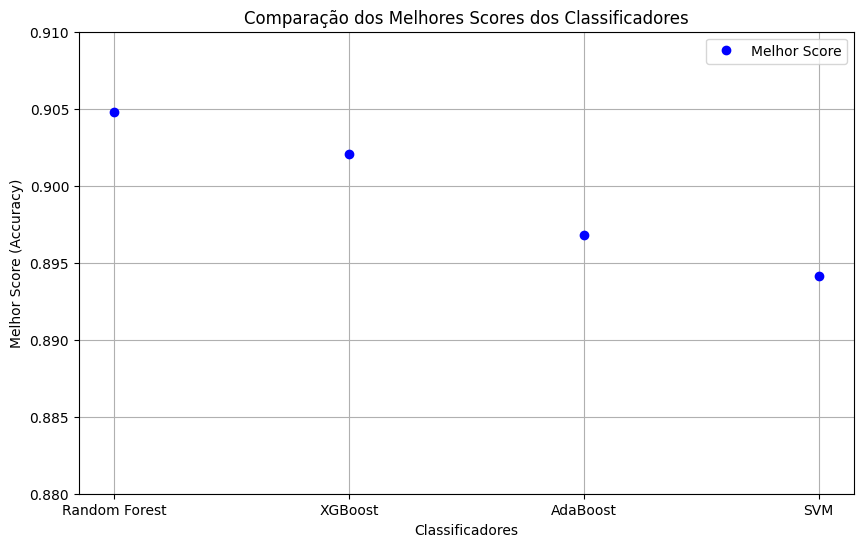

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(classifiers_names, best_scores, marker='o', linestyle=' ', color='b', label='Melhor Score')
plt.title('Comparação dos Melhores Scores dos Classificadores')
plt.xlabel('Classificadores')
plt.ylabel('Melhor Score (Accuracy)')
plt.ylim(0.88, 0.91)  # Definindo limites para melhor visualização
plt.grid(True)
plt.legend()

# Exibindo o gráfico
plt.show()


Treinando e avaliando o classificador otimizado: Random Forest
Classifier: Random Forest, Accuracy: 0.8917
AUC on training set: 0.977
AUC on test set: 0.927
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.53      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



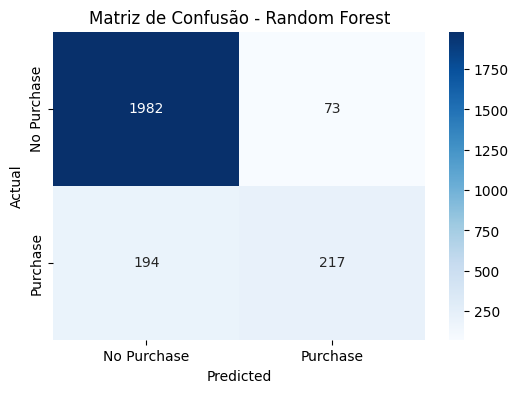


Treinando e avaliando o classificador otimizado: XGBoost
Classifier: XGBoost, Accuracy: 0.8901
AUC on training set: 0.940
AUC on test set: 0.928
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



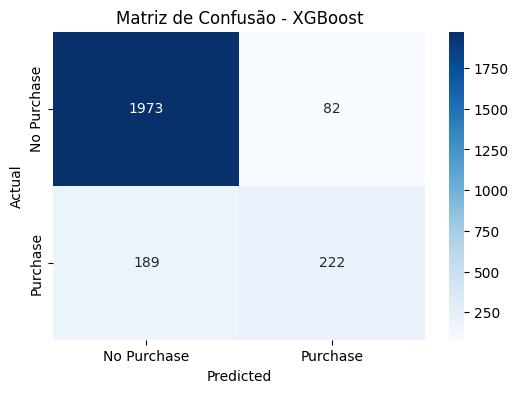


Treinando e avaliando o classificador otimizado: AdaBoost
Classifier: AdaBoost, Accuracy: 0.8824
AUC on training set: 0.920
AUC on test set: 0.915
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.69      0.53      0.60       411

    accuracy                           0.88      2466
   macro avg       0.80      0.74      0.77      2466
weighted avg       0.87      0.88      0.88      2466



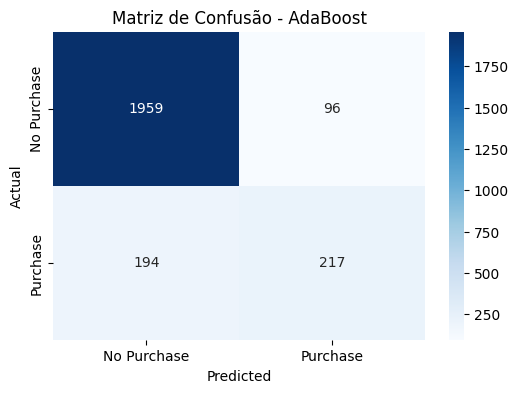


Treinando e avaliando o classificador otimizado: SVM
Classifier: SVM, Accuracy: 0.8804
AUC on training set: 0.912
AUC on test set: 0.843
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.74      0.44      0.55       411

    accuracy                           0.88      2466
   macro avg       0.82      0.70      0.74      2466
weighted avg       0.87      0.88      0.87      2466



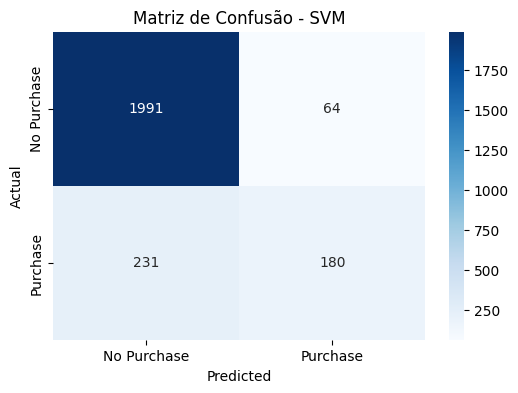

In [ ]:
# Avaliar classificadores otimizados
for classifier_name, grid_search in optimized_classifiers.items():
    print(f"\nTreinando e avaliando o classificador otimizado: {classifier_name}")
    train_and_evaluate_classifier(grid_search, classifier_name)

#Análise do modelo

In [ ]:
data2 = pd.get_dummies(data, columns=['Month','OperatingSystems','Browser','VisitorType','Weekend'],
                   drop_first=True)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10)
rf.fit(data.drop(['Revenue'],axis=1), data.Revenue)
features = data.drop(['Revenue'],axis=1).columns.values

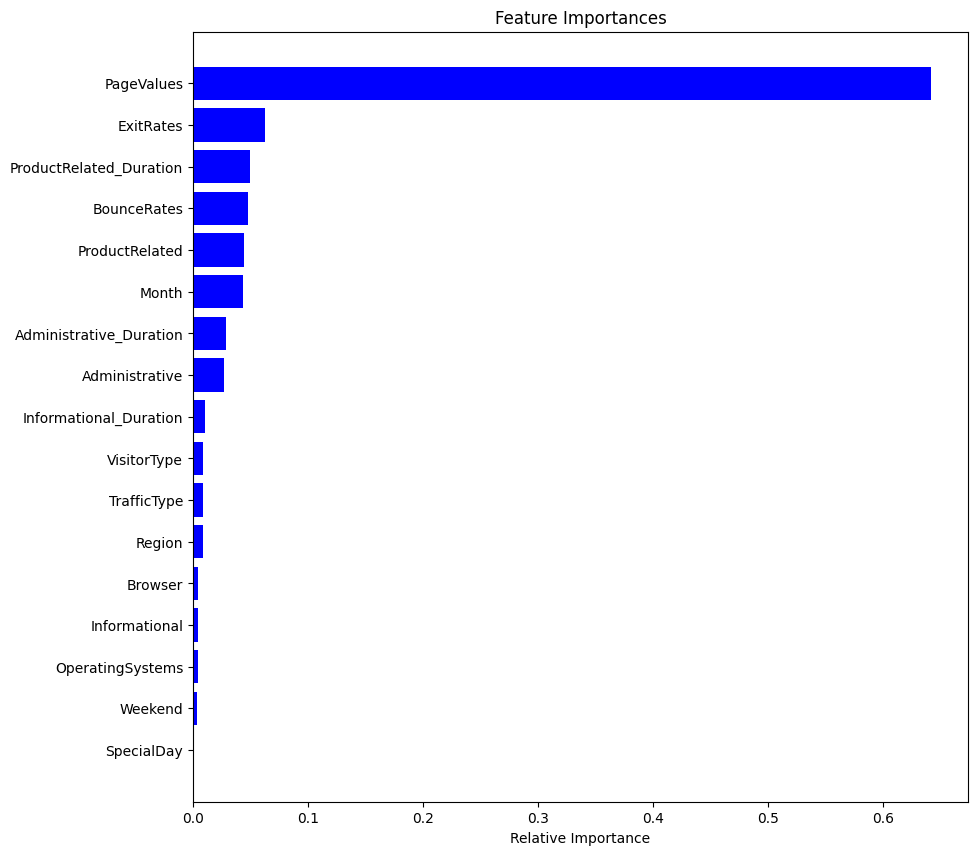

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Random Forest AUC: {rf_scores.mean()} ± {rf_scores.std()}')


Random Forest AUC: 0.9286688428638584 ± 0.008770775408632206


#####Análise de overfitting

In [ ]:
rf_model.fit(X_train, y_train)
# Avalie no conjunto de treinamento
train_preds = rf_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_preds)
print(f'Train AUC: {train_auc}')

Train AUC: 0.9776185173821609


In [ ]:
# Avalie no conjunto de teste
test_preds = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_preds)
print(f'Test AUC: {test_auc}')

Test AUC: 0.9264733218486748


#Teste de melhor modelo (ou da rede neural)



In [ ]:
# Pegamos o melhor modelo
best_model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# Compilamos com o melhor otimizador
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

# Salvamos o modelo treinado
best_model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Carregar o modelo salvo
model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# Criar dados aleatórios
def generate_random_data(num_samples):
    random_data = pd.DataFrame({
        'Administrative': np.random.randint(0, 27, num_samples),
        'Administrative_Duration': np.random.uniform(0, 1000, num_samples),
        'Informational': np.random.randint(0, 24, num_samples),
        'Informational_Duration': np.random.uniform(0, 1000, num_samples),
        'ProductRelated': np.random.randint(0, 705, num_samples),
        'ProductRelated_Duration': np.random.uniform(0, 64000, num_samples),
        'BounceRates': np.random.uniform(0, 1, num_samples),
        'ExitRates': np.random.uniform(0, 1, num_samples),
        'PageValues': np.random.uniform(0, 361, num_samples),
        'SpecialDay': np.random.choice([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], num_samples),
        'Month': np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], num_samples),
        'OperatingSystems': np.random.randint(1, 9, num_samples),
        'Browser': np.random.randint(1, 14, num_samples),
        'Region': np.random.randint(1, 10, num_samples),
        'TrafficType': np.random.randint(1, 21, num_samples),
        'VisitorType': np.random.choice([0, 1, 2], num_samples),
        'Weekend': np.random.choice([0, 1], num_samples)
    })
    return random_data

In [ ]:
# Gerar dados e realizar previsões
new_data = generate_random_data(5)
print(new_data)

# Normalizar os dados
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Realizar previsões
predictions = model.predict(new_data_scaled)

# Imprimir as previsões
for i, prediction in enumerate(predictions):
    print(f'Dado {i} : {prediction[0]*100:.2f}%')

   Administrative  Administrative_Duration  Informational  \
0              16               166.915205             22   
1               7                51.315547             12   
2              17               413.340072             20   
3              13               159.470004             22   
4              23               492.655794             18   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0              451.715321             592              1143.809155   
1              207.142275             299             47666.388489   
2              783.476847             347             56393.813623   
3              375.841658             414             35123.733306   
4              834.518330             365             55872.073913   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     0.898714   0.214663  354.290998         0.4      2                 3   
1     0.407822   0.440969  173.040697         0.8      4